In [1]:
import pandas as pd
import Quandl
import pandas_datareader.data as web
%matplotlib inline

In [2]:
start = pd.Timestamp("1993-04-27")
end = pd.Timestamp("2015-12-30")
year = pd.Timedelta('365 days')
online = False

In [3]:
if online:
    bovespa = web.DataReader("^BVSP", 'yahoo', start, end)
    usdbrl = Quandl.get("CURRFX/USDBRL")
    bovespa.to_csv('bovespa_brl.csv')
    usdbrl.to_csv('usdbrl.csv')
else:
    bovespa = pd.read_csv('bovespa_brl.csv', index_col='Date', parse_dates=True)
    usdbrl = pd.read_csv('usdbrl.csv', index_col='Date', parse_dates=True)

In [4]:
df = pd.DataFrame()
df['bovespa_brl'] = bovespa[u'Adj Close']
df['usdbrl'] = usdbrl.Rate
df['bovespa_usd'] = df.bovespa_brl / df.usdbrl

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C497D30>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000000C674B00>], dtype=object)

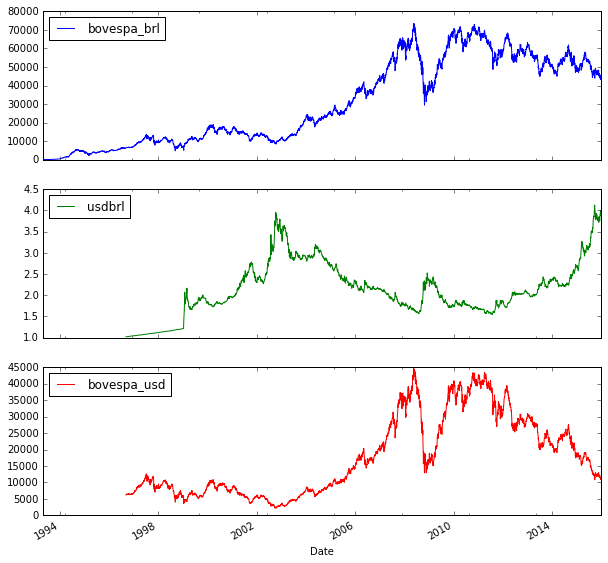

In [5]:
df.plot(subplots=True, figsize=(10, 10), sharex=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D64A550>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000000DA75208>], dtype=object)

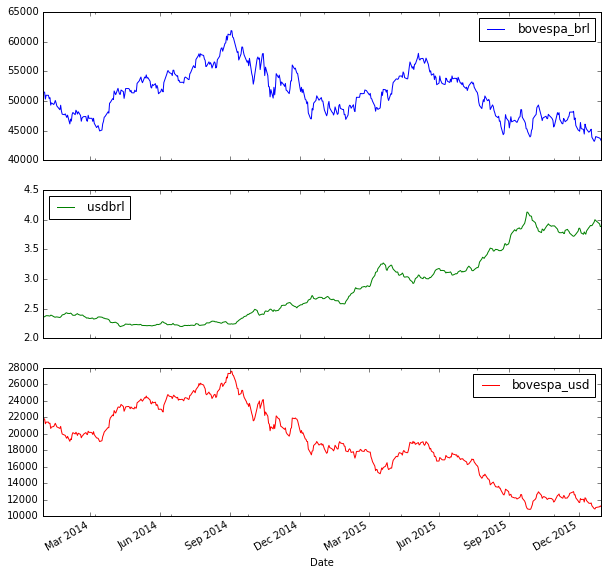

In [6]:
# Los últimos 2 años
df.loc[(end - 2*year):].plot(subplots=True, figsize=(10, 10), sharex=True)